### Student Information
Name: 戴迪生

Student ID: 113351037 (NCCU)

GitHub ID:Max901028

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import plotly as py
import math
import helpers.data_mining_helpers as dmh

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


### Data introduction &  Data cleansing

In [2]:
### Begin Assignment Here
reddit_s = pd.read_csv('/Users/daidisheng/Desktop/研究所/資料探勘/DM2025-Lab1-Exercise-main/newdataset/Reddit-stock-sentiment.csv')
reddit_s

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


##### Quering Date (HW2)

In [3]:
reddit_s1 = reddit_s.copy(deep=True)
reddit_s1_1 = reddit_s1[['subreddit', 'sentiment']]

##### Joining strings (HW1)

In [4]:
#. combining title and text, because they are the same thing in sentiment analysis
x = []
for i in range(847):
    x.append(" ".join((reddit_s1.title[i] + "\n "+ reddit_s1.text[i]).split(' ')))
    
X = pd.DataFrame({'text': x})

In [5]:
reddit_s1_1 = pd.concat([reddit_s1_1, X], axis =1)

##### Automating Ylim (HW7)

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit source'}, xlabel='subreddit'>

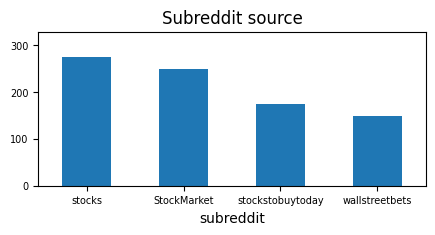

In [6]:
lim = reddit_s1_1.subreddit.value_counts().max() * 1.2
print(reddit_s1_1.subreddit.value_counts())
reddit_s1_1.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit source',
                                           ylim = [0, lim], 
                                           rot = 0, fontsize = 7, figsize = (5,2))

In [7]:
Y = reddit_s1_1.sort_values("subreddit", ignore_index= True)

In [8]:
Y.sentiment.value_counts()

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64

##### Checking if data have missing values (HW4)

In [9]:
Y.isnull().apply(lambda t: dmh.check_missing_values(t))

,subreddit,sentiment,text
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


#### comparing different datas (HW8)

- **We can see that "stockbytoday"is the most positive, and sentiment in "StockMarket" is more averagely composed**

      StockMarket  stocks  stockstobuytoday  wallstreetbets
1.0            96     107               104              60
0.0            82      86                56              59
-1.0           72      81                14              30


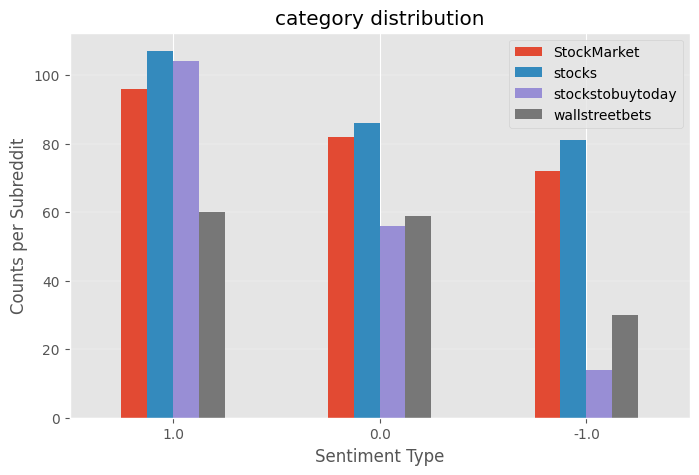

In [10]:
Ys = pd.DataFrame({'StockMarket': list(Y['sentiment'][0:250].value_counts()), 
                   'stocks': list(Y['sentiment'][250:524].value_counts()),
                   'stockstobuytoday': list(Y['sentiment'][524:698].value_counts()),
                   'wallstreetbets': list(Y['sentiment'][698:].value_counts())
}, index= ['1.0','0.0', '-1.0'])


print(Ys)


plt.style.use('ggplot')
ax = Ys.plot(kind='bar',
         title = 'category distribution',
         rot=0,
         figsize=(8, 5)
         )


ax.grid(axis = 'y', linewidth=0.2)
plt.xlabel('Sentiment Type')
plt.ylabel("Counts per Subreddit")
plt.show()

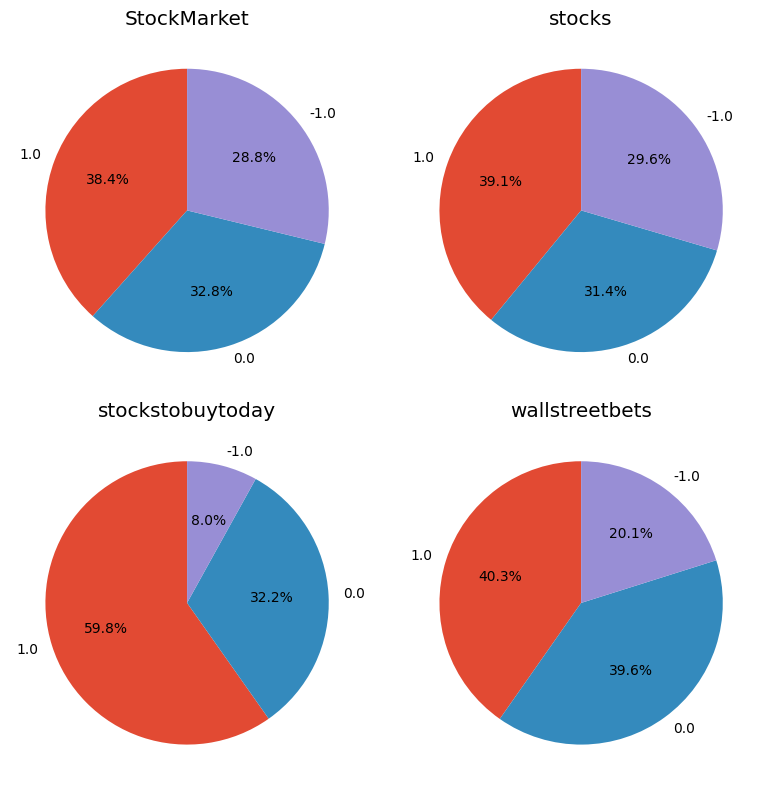

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # 2x2 grid

for ax, col in zip(axes.ravel(), Ys.columns):
    Ys[col].plot.pie(
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        legend=False,
        ylabel="",          
        title=col
    )

plt.tight_layout()
plt.show()

### Text Anaysis

##### Testing model (HW9)

In [12]:
count_vect = CountVectorizer() # bag of words
Y_counts = count_vect.fit_transform(Y.text) #learn the vocabulary and return document-term matrix
count_vect.get_feature_names_out()

array(['00', '000', '01378', ..., 'zgld', 'zone', 'zsil'], dtype=object)

In [13]:
analyze = count_vect.build_analyzer()
analyze(Y.text[0])[0:20]

['the',
 'trump',
 'administration',
 'is',
 'begging',
 'xi',
 'jinping',
 'to',
 'call',
 'trump',
 'quickly',
 'trump',
 'signaled',
 'that',
 'he',
 'panicked',
 'at',
 'the',
 'bond',
 'market']

##### Data selection and Visualization (HW11)

In [14]:
term_frequencies = np.asarray(Y_counts.sum(axis=0))[0]
term_frequenciesid = np.argsort(-term_frequencies)
freq = Y_counts.toarray() 
freqsum = np.vstack([freq, term_frequencies])
freqsumsort = freqsum[:, term_frequenciesid]  
freqsumsort 

array([[   2,    3,    2, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   1,    1,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [1262,  776,  554, ...,    1,    1,    1]])

##### A slice of unsequenced data (HW13)

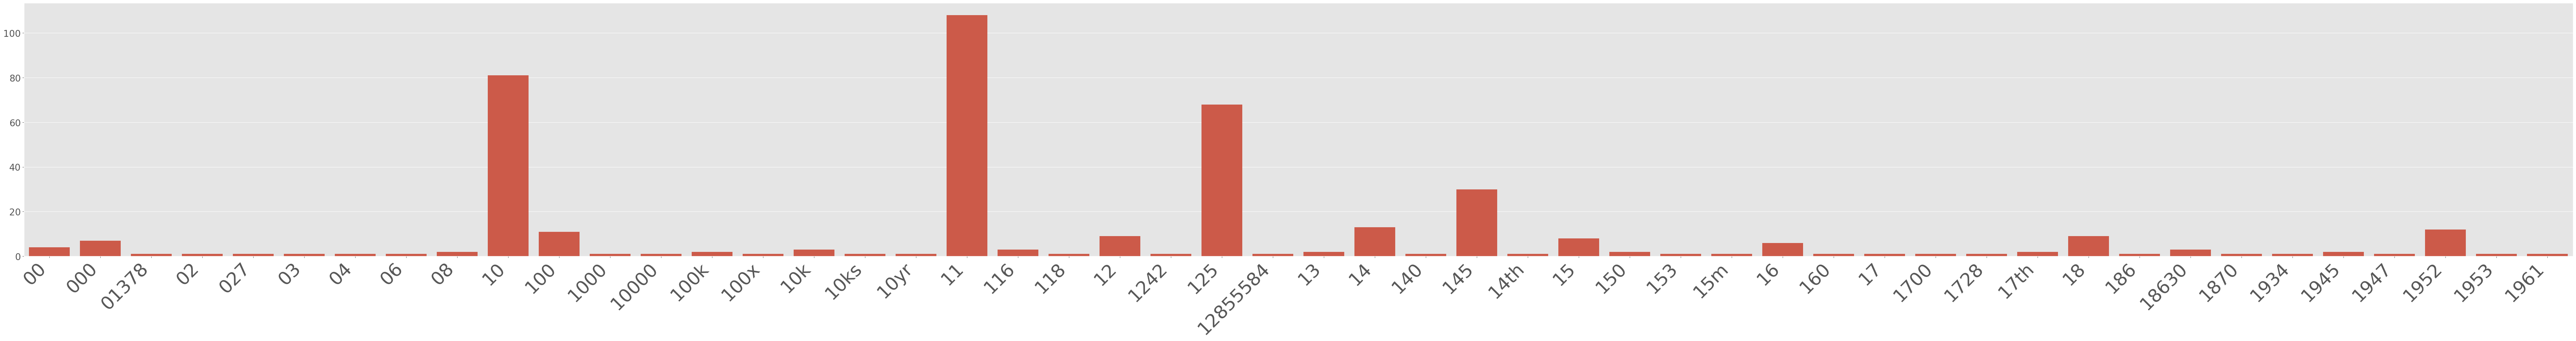

In [15]:
import seaborn as sns

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], 
            y=term_frequencies[:50])

plt.xticks(fontsize=40, rotation=45, ha="right") 
plt.yticks(fontsize=20)
plt.show()


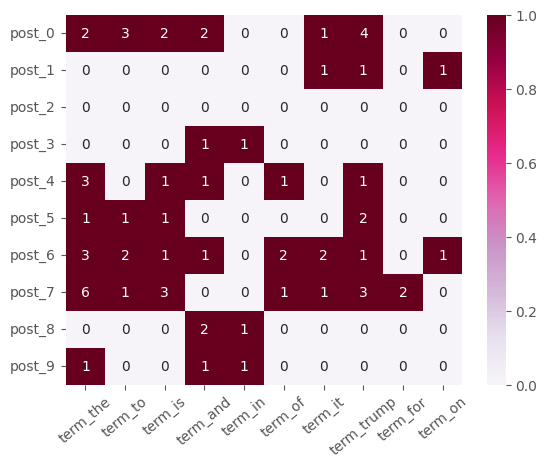

In [16]:
term = ["term_"+str(i) for i in count_vect.get_feature_names_out()[term_frequenciesid][0:10]]
doc = ["post_"+ str(i) for i in list(Y.index[0:10])]

Y1 = pd.DataFrame(freqsumsort[:10, :10], 
                  index=doc,
                  columns=term)

g = sns.heatmap(Y1,cmap="PuRd",
                 vmin=0, vmax=1, annot=True).set_xticklabels(term, rotation = 40)

##### Sequencing the data decreasingly (HW14)

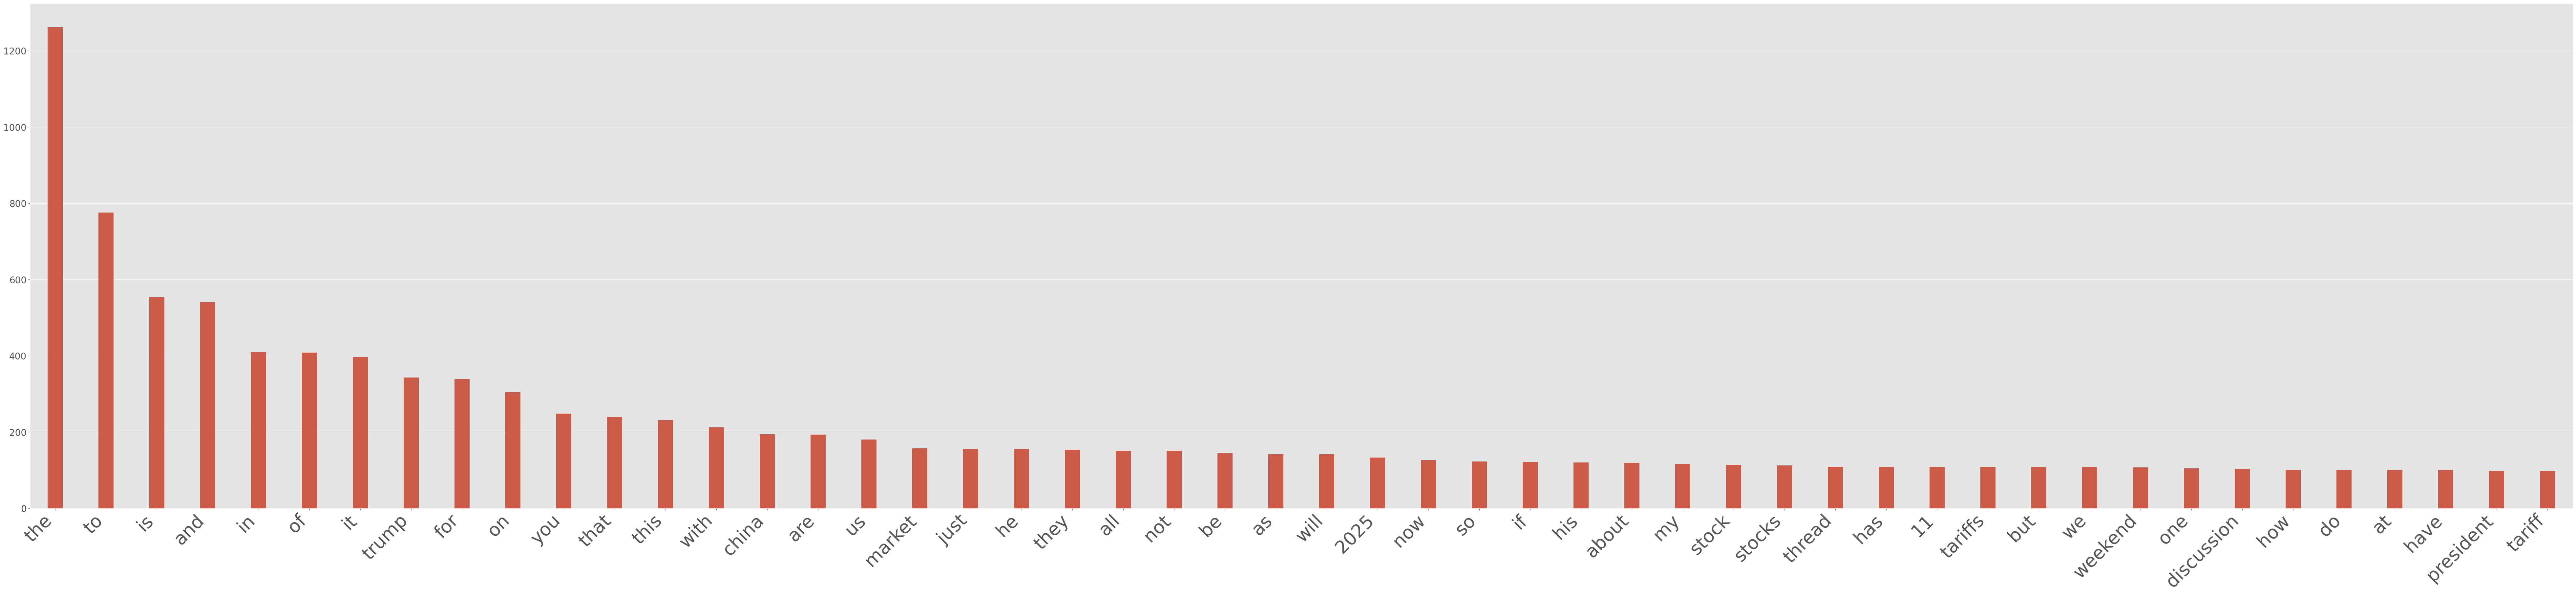

In [17]:
plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names_out()[term_frequenciesid][:50], 
            y=freqsumsort[-1,:50], 
            width= 0.3,
            capsize= 160)



plt.xticks(fontsize=40, rotation=45, ha="right") 
plt.yticks(fontsize=20)
plt.show()


##### Using plotly to visulize the data(sequenced) (HW12)
- 自訂函數是從stackoverflow找到的


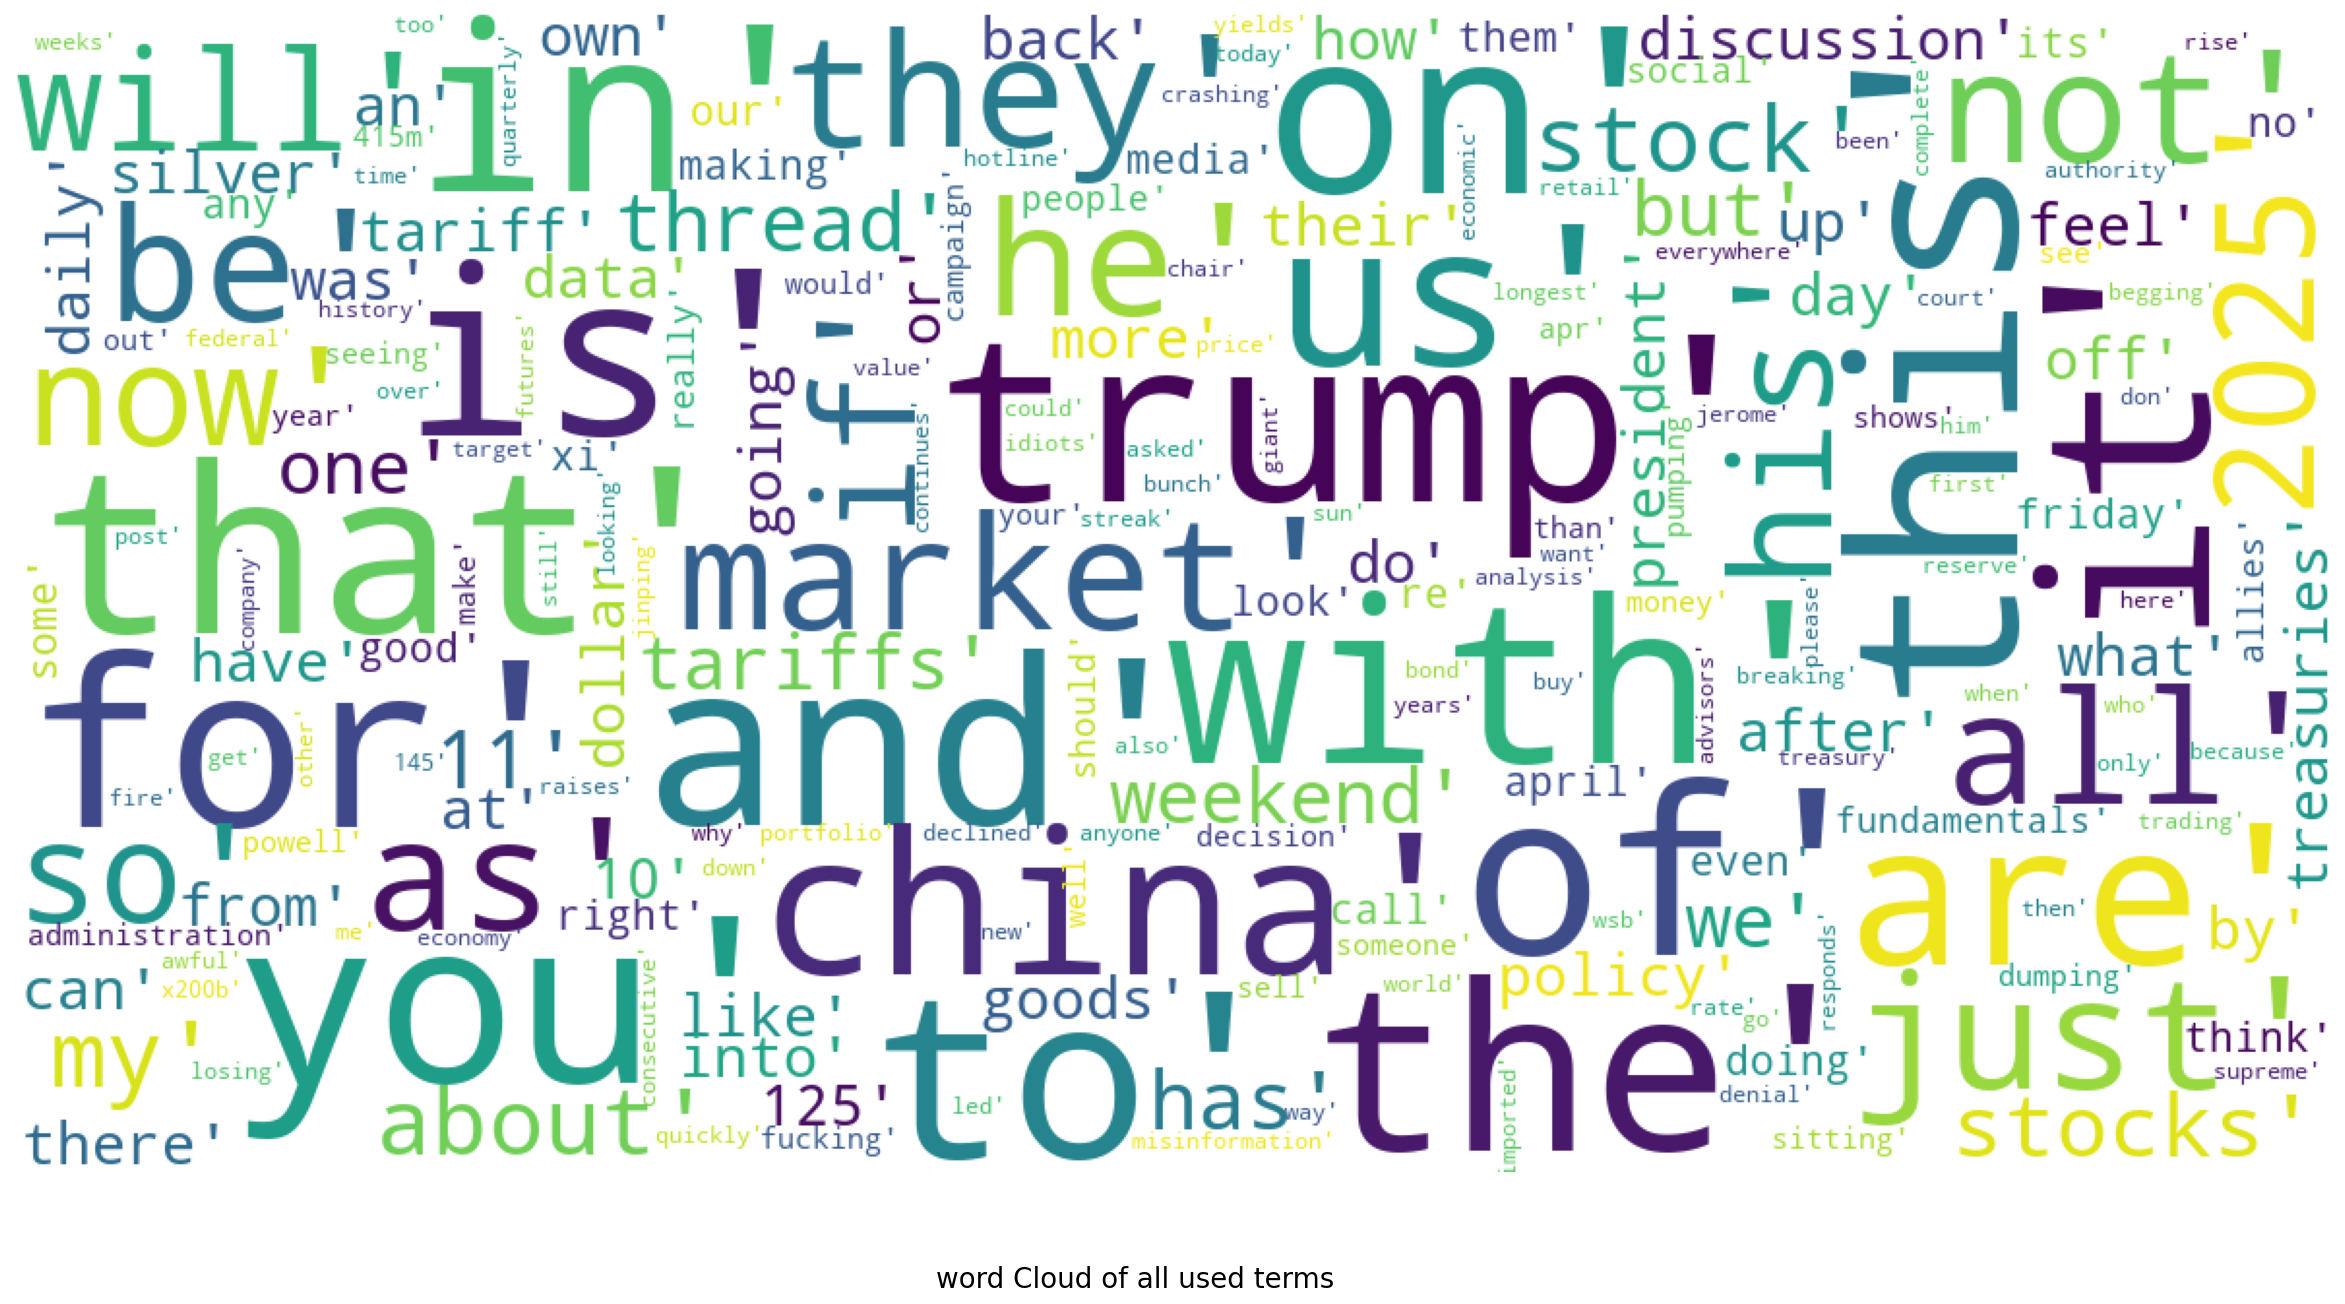

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Stopwords=set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords= Stopwords,
        max_words=2000,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(30, 30))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

termdf = pd.DataFrame({"frequency":freqsumsort[-1,:4000], "term":count_vect.get_feature_names_out()[term_frequenciesid][:4000]}) 
termdict = dict(zip(termdf.term,termdf.frequency))
show_wordcloud(termdict, title='word Cloud of all used terms')

##### logrithmic data (HW15)

/var/folders/7s/nxc83svx6bnczl6crz71hrkw0000gn/T/ipykernel_43858/1460939260.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[term_frequenciesid][:100], rotation = 90);


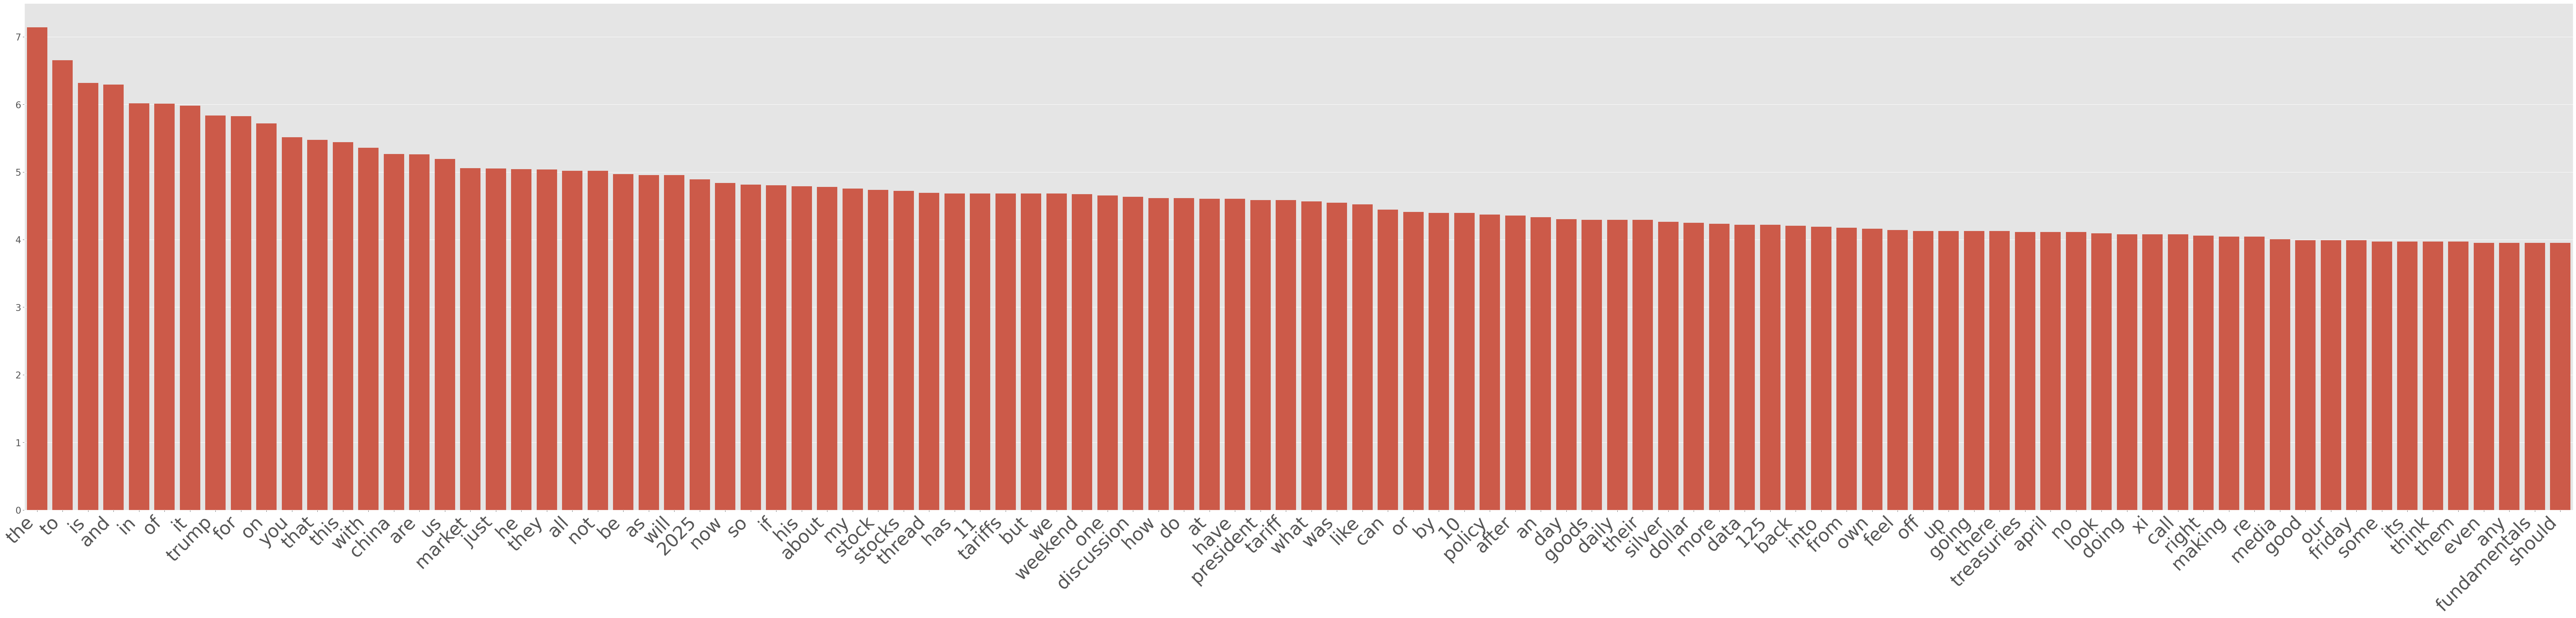

In [19]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names_out()[term_frequenciesid][:100],
                y=np.asarray(term_frequencies_log)[term_frequenciesid][:100])
g.set_xticklabels(count_vect.get_feature_names_out()[term_frequenciesid][:100], rotation = 90);

plt.xticks(fontsize=40, rotation=45, ha="right") 
plt.yticks(fontsize=20)
plt.show()

# Phase 2

In [44]:
### Begin Assignment Here

In [20]:
Y

,subreddit,sentiment,text
0,StockMarket,1.0,The Trump administration is begging Xi Jinping...
1,StockMarket,0.0,Trump: We Are Doing Really Well On Our Tariff ...
2,StockMarket,0.0,Data Shows US Allies—Not China—Dumping Treasur...
3,StockMarket,1.0,How do you feel about a sitting president maki...
4,StockMarket,1.0,"Trump is surrounded by a bunch of idiots, he s..."
...,...,...,...
842,wallstreetbets,0.0,Weekend Discussion Thread for the Weekend of A...
843,wallstreetbets,-1.0,Retardation is on the menu boys! WSB is so bac...
844,wallstreetbets,0.0,Someone post the hotline please.\n Found the k...
845,wallstreetbets,0.0,Weekend Discussion Thread for the Weekend of A...


In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


#Create separate DataFrames for each category
categories = Y['subreddit'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = Y[Y['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [29]:
filt_term_document_dfs['StockMarket']

,027,10,100,100x,11,12,125,145,1945,1947,...,yeah,year,years,yes,yet,yo,you,your,yourselves,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


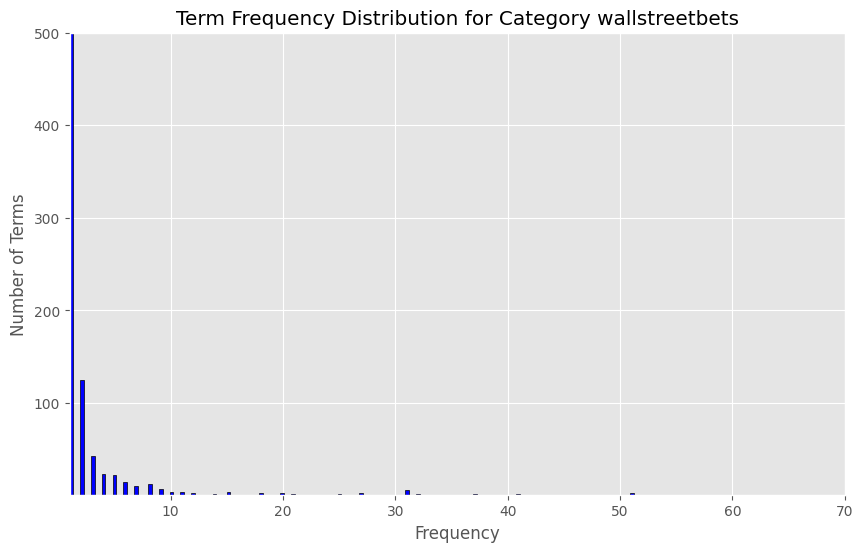

In [40]:
import matplotlib.pyplot as plt
# Sum over all documents to get total frequency for each word
category_number=3 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy() # 特定一個類別的term document

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 70)
plt.ylim(1, 500)
plt.show()

In [52]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values() #回傳panda.series，index是文字，由小頻率排到大頻率
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove) # 第一次看到這個用法

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])


term_document_dfs['wallstreetbets']


,100,1000,10k,12,14,16,17th,18,186,18630,...,wutang,xi,year,years,yesterday,yet,yippee,your,yourself,ytd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category}.csv', '>=', 1)     # Transactional Data Base

# Transactional Data -> 資料只含 (Document, items)

StockMarket
Database size (total no of transactions) : 249
Number of items : 1516
Minimum Transaction Size : 1
Average Transaction Size : 12.216867469879517
Maximum Transaction Size : 158
Standard Deviation Transaction Size : 14.206493390146745
Variance in Transaction Sizes : 202.63826272833268
Sparsity : 0.9919413802969133


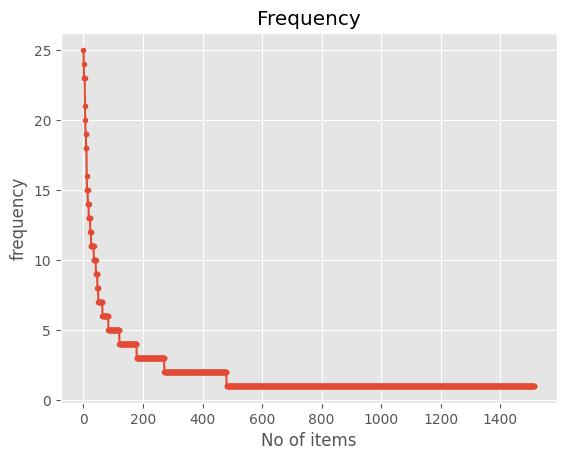

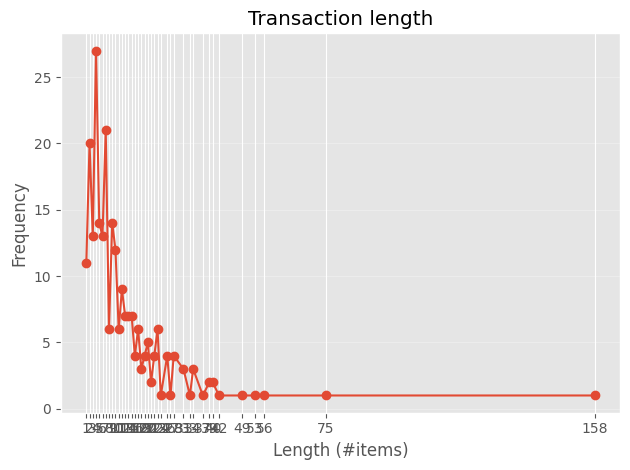

stocks
Database size (total no of transactions) : 273
Number of items : 2223
Minimum Transaction Size : 1
Average Transaction Size : 16.75824175824176
Maximum Transaction Size : 179
Standard Deviation Transaction Size : 18.735682587960095
Variance in Transaction Sizes : 352.31633807369104
Sparsity : 0.9924614297083932


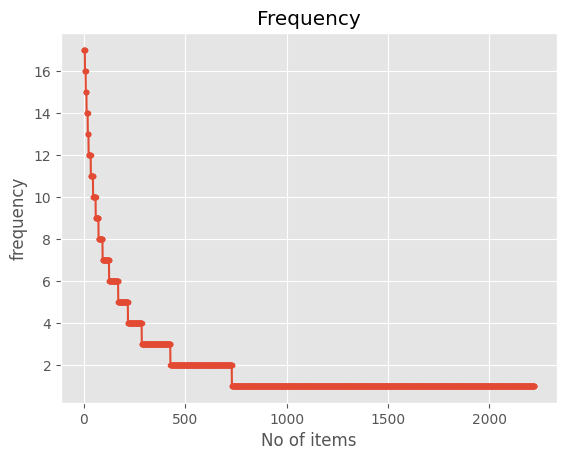

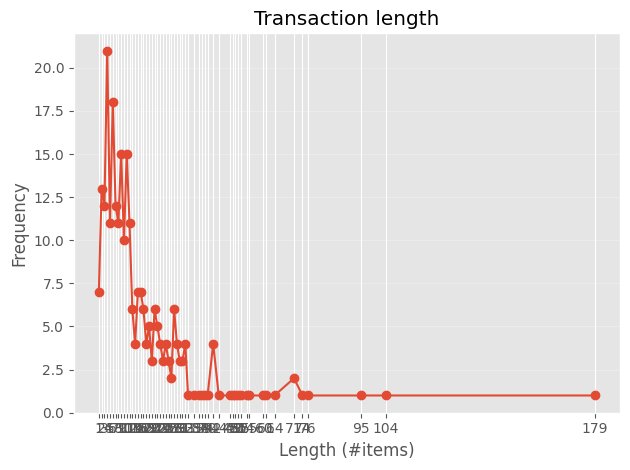

stockstobuytoday
Database size (total no of transactions) : 173
Number of items : 1693
Minimum Transaction Size : 1
Average Transaction Size : 16.55491329479769
Maximum Transaction Size : 220
Standard Deviation Transaction Size : 25.43548205825545
Variance in Transaction Sizes : 650.7251646726711
Sparsity : 0.9902215515092748


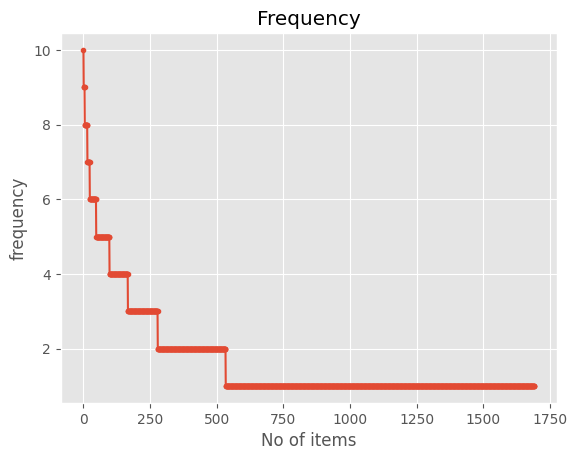

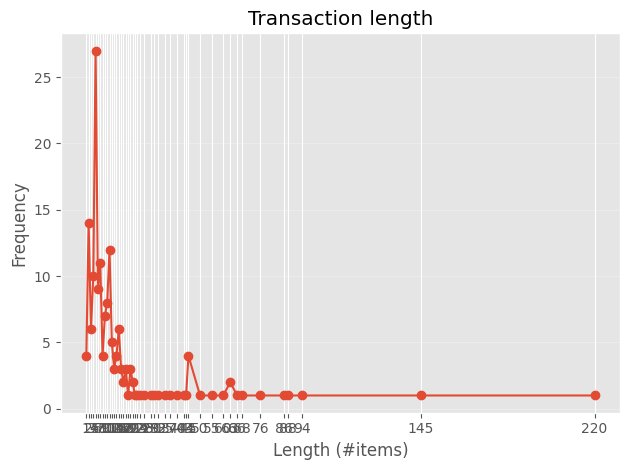

wallstreetbets
Database size (total no of transactions) : 148
Number of items : 943
Minimum Transaction Size : 1
Average Transaction Size : 11.304054054054054
Maximum Transaction Size : 79
Standard Deviation Transaction Size : 11.141387889539896
Variance in Transaction Sizes : 124.97494943923515
Sparsity : 0.9880126680232725


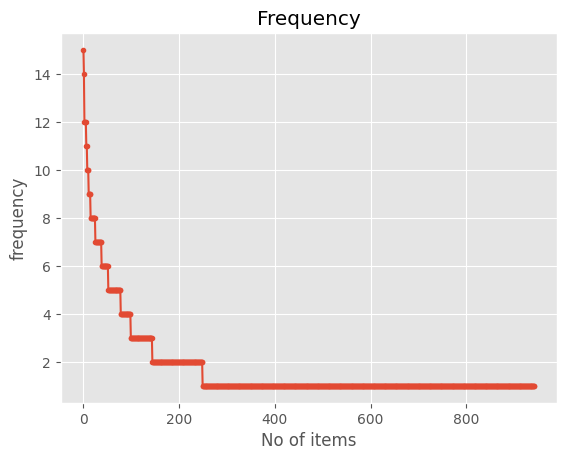

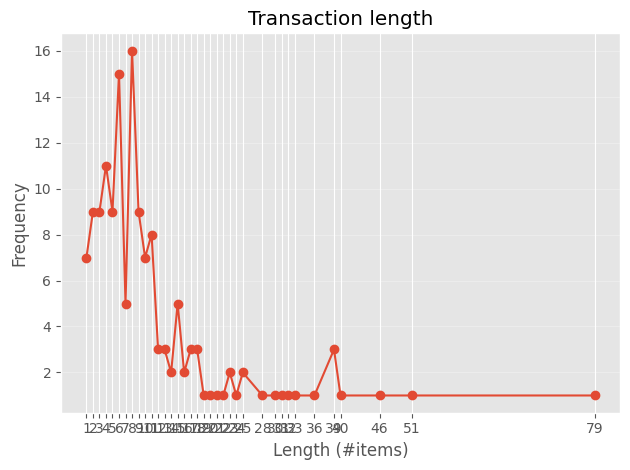

In [56]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in term_document_dfs:
    print(category)
    obj = tds.TransactionalDatabase(f'td_freq_db_{category}.csv')
    obj.run() # 啟動
    obj.printStats() # print basic statisics
    obj.plotGraphs() # print various Distribution Graphs

In [57]:
for category in term_document_dfs:
    print(category)

StockMarket
stocks
stockstobuytoday
wallstreetbets


### FPG-Growth Pattern Mining

In [70]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)  #initialize
obj1.mine()                                                         #start the mining process

frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()       #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_StockMarket_minSup5.txt') #save the patterns
frequentPatternsDF_StockMarket

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 156
Runtime: 0.004730701446533203


,Patterns,Support
0,bond,5
1,great,5
2,americans,5
3,care,5
4,power,5
...,...,...
151,sun\tsurrounded\tlaunch,23
152,idiots\tsurrounded\tlaunch,23
153,sun\tidiots\tsurrounded\tlaunch,23
154,what,24


In [71]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj2 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)  #initialize
obj2.mine()                                                         #start the mining process

frequentPatternsDF_stocks= obj2.getPatternsAsDataFrame()       #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime
obj2.save('freq_patterns_stocks_minSup5.txt') #save the patterns
frequentPatternsDF_stocks

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4562
Runtime: 0.011054754257202148


,Patterns,Support
0,90,5
1,start,5
2,first,5
3,old,5
4,today,5
...,...,...
4557,don,17
4558,see,17
4559,most,17
4560,me,17


In [72]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj3 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)  #initialize
obj3.mine()                                                         #start the mining process

frequentPatternsDF_stockstobuytoday= obj3.getPatternsAsDataFrame()       #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime
obj3.save('freq_patterns_stockstobuytoday_minSup5.txt') #save the patterns
frequentPatternsDF_stockstobuytoday

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2168
Runtime: 0.0036051273345947266


,Patterns,Support
0,markets,5
1,electric,5
2,significant,5
3,did,5
4,ideas,5
...,...,...
2163,how,9
2164,think,9
2165,going,9
2166,get,9


In [73]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj4 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)  #initialize
obj4.mine()                                                         #start the mining process

frequentPatternsDF_wallstreetbets= obj4.getPatternsAsDataFrame()       #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime
obj4.save('freq_patterns_wallstreetbets_minSup5.txt') #save the patterns
frequentPatternsDF_wallstreetbets

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1222
Runtime: 0.003804922103881836


,Patterns,Support
0,buy,5
1,went,5
2,literally,5
3,money,5
4,would,5
...,...,...
1217,good\t14,6
1218,have,12
1219,but,12
1220,can,14


#### Filtering out common patterns across categories

In [75]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_StockMarket, frequentPatternsDF_stocks, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_wallstreetbets]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")


                                  Patterns  Support
79                                     sun       25
65                                  idiots       23
72                         surrounded\tsun       23
66                             idiots\tsun       23
67                                  launch       23
...                                    ...      ...
5606      gainers\thighlights\tcap\ttrends        5
5607   gainers\thighlights\tethusd\ttrends        5
5608  gainers\thighlights\tpepeusd\ttrends        5
5609   gainers\thighlights\tcharts\ttrends        5
0                                     bond        5

[7844 rows x 2 columns]
Number of patterns discarded: 264


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
Y_tdm = count_vect.fit_transform(Y['text'])  # Y['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
Y['tokenized_text'] = Y['text'].str.split().apply(set)

# Initialize the pattern matrix(全為0)
pattern_matrix = pd.DataFrame(0, index=Y.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence

# Loop over every pattern.
# Split the pattern string into individual words (e.g., "god atheism" → {'god', 'atheism'}).
# For each document:
#   Check if all words in that pattern are contained in the document’s token set.
#   If yes → assign 1 (pattern present), else 0.

for pattern in final_pattern_df['Patterns']: 
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = Y['tokenized_text'].apply(lambda y: 1 if pattern_words.issubset(y) else 0) # .apply() -> 對每一欄都做; lambda:x 中的x指的是tokenized set中的每一個set
 
# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(Y_tdm.toarray(), columns=terms, index=Y.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1) # by column 

augmented_df

,00,000,01378,02,027,03,04,06,08,10,...,charts\tprices\ttrends,cryptocurrency\tjasmyusd\ttrends,cryptocurrency\tprices\ttrends,jasmyusd\tprices\ttrends,gainers\thighlights\tbtcusd\ttrends,gainers\thighlights\tcap\ttrends,gainers\thighlights\tethusd\ttrends,gainers\thighlights\tpepeusd\ttrends,gainers\thighlights\tcharts\ttrends,bond
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### FAE Top-K Pattern Mining

In [ ]:
from PAMI.frequentPattern.topk import FAE  as alg
inputFile = 'td_freq_db_StockMarket.csv'

kCount=10  #Users can also specify this constraint between 0 to 1.

seperator='\t'

obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

obj.save(outFile='StockMarket_top10s.txt')
frequentPatternsDF= obj.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF)))
print('Runtime: ' + str(obj.getRuntime()))
frequentPatternsDF

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 10
Runtime: 0.005825042724609375


,Patterns,Support
0,sun,25
1,what,24
2,idiots,23
3,launch,23
4,surrounded,23
5,launch idiots sun surrounded,23
6,idiots sun launch,23
7,idiots sun surrounded,23
8,sun idiots,23
9,launch sun surrounded,23


In [95]:
from PAMI.frequentPattern.topk import FAE  as alg
inputFile = 'td_freq_db_StockMarket.csv'

kCount=15  #Users can also specify this constraint between 0 to 1.

seperator='\t'

obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

obj.save(outFile='StockMarket_top15s.txt')
frequentPatternsDF= obj.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF)))
print('Runtime: ' + str(obj.getRuntime()))
frequentPatternsDF

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 15
Runtime: 0.004103899002075195


,Patterns,Support
0,sun,25
1,what,24
2,idiots,23
3,launch,23
4,surrounded,23
5,launch idiots sun surrounded,23
6,idiots sun launch,23
7,idiots sun surrounded,23
8,sun idiots,23
9,launch sun surrounded,23


In [93]:
from PAMI.frequentPattern.topk import FAE  as alg
inputFile = 'td_freq_db_StockMarket.csv'

kCount=20  #Users can also specify this constraint between 0 to 1.

seperator='\t'

obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

obj.save(outFile='StockMarket_top20s.txt')
frequentPatternsDF= obj.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF)))
print('Runtime: ' + str(obj.getRuntime()))
frequentPatternsDF

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 20
Runtime: 0.006125926971435547


,Patterns,Support
0,sun,25
1,what,24
2,idiots,23
3,launch,23
4,surrounded,23
5,launch idiots sun surrounded,23
6,idiots sun launch,23
7,idiots sun surrounded,23
8,sun idiots,23
9,launch sun surrounded,23


### MaxFPGrowth Pattern Mining

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns   runtime    memory
0  MaxFPGrowth       5       116  0.007914  44990464
1  MaxFPGrowth      10        39  0.004448  47169536
2  MaxFPGrowth      15        12  0.000981  49020928
3  MaxFPGrowth      20         4  0.000764  49168384
4  MaxFPGrowth      25         0  0.000750  49250304


<Axes: xlabel='minSup'>

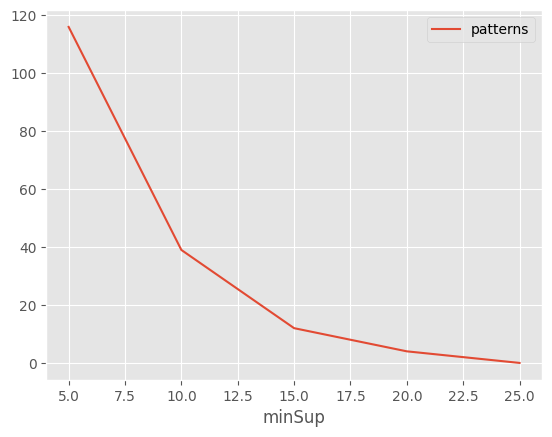

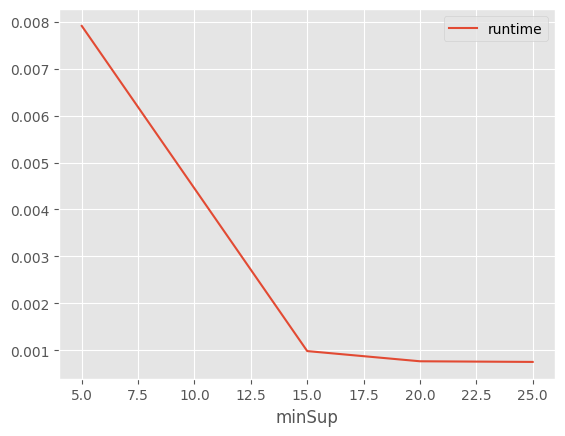

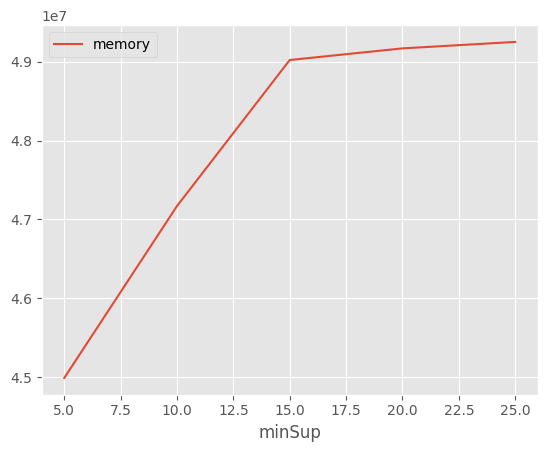

In [ ]:
## maxFPG

from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'td_freq_db_StockMarket.csv'
seperator='\t'
minimumSupportCountList = [5, 10, 15, 20, 25]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory']) #initialize a data frame to store the results of MaxFPGrowth algorithm

for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

print(result)
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

### Dimensionality Reduction

/Users/daidisheng/Desktop/研究所/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


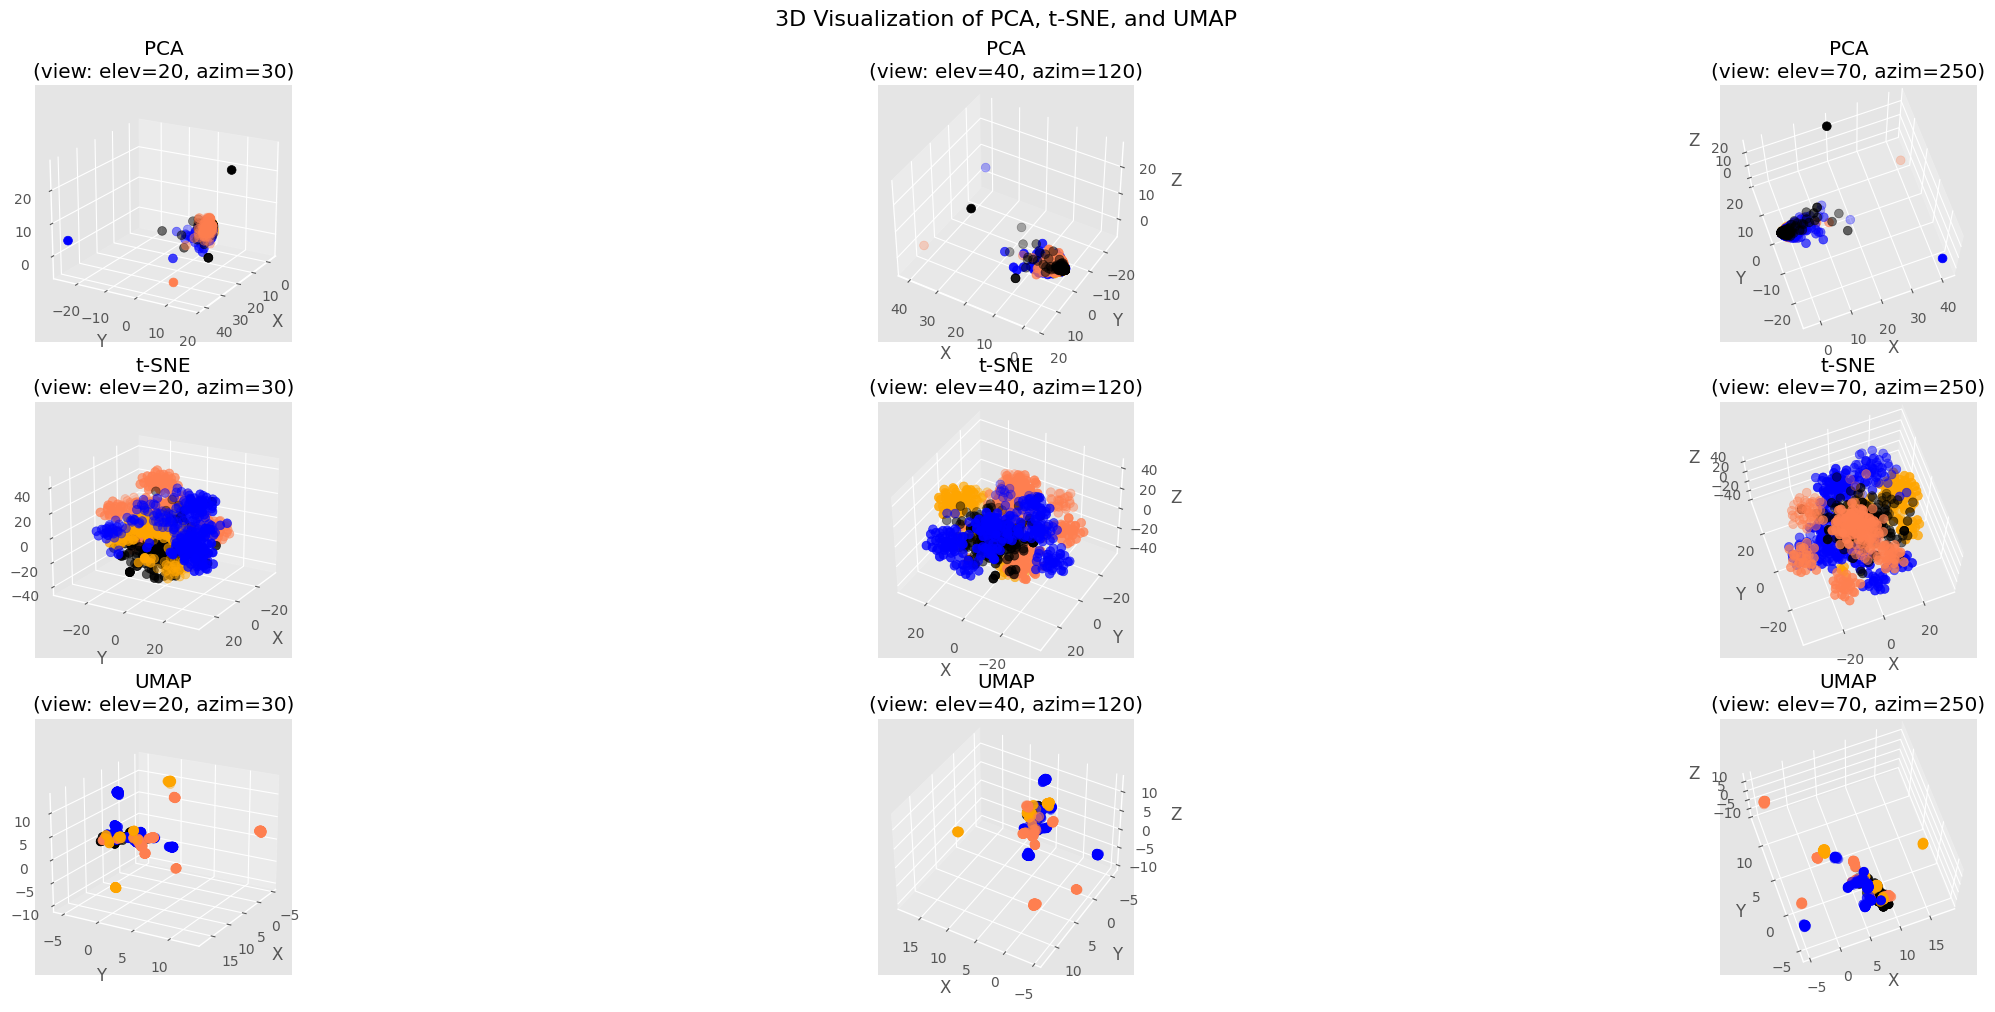

In [102]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# === Step 1. Dimensionality Reduction to 3D ===
Y_pca_3d = PCA(n_components=3).fit_transform(Y_tdm.toarray())
Y_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(Y_tdm.toarray())
Y_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(Y_tdm.toarray())

col = ['coral', 'blue', 'black', 'orange']
categories = Y['subreddit'].unique()

# === Step 2. Define a 3D plotting function ===
def plot_scatter_3d(ax, Y_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = Y_reduced[Y['subreddit'] == category, 0]
        ys = Y_reduced[Y['subreddit'] == category, 1]
        zs = Y_reduced[Y['subreddit'] == category, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, s=40)
    
    ax.view_init(elev=elev, azim=azim)  # set camera angle
    ax.set_title(f"{title}\n(view: elev={elev}, azim={azim})")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# === Step 3. Create 3D plots from 3 different angles ===
fig = plt.figure(figsize=(30, 10))
fig.suptitle('3D Visualization of PCA, t-SNE, and UMAP', fontsize=16)

# Example: plot PCA from 3 different viewing angles
angles = [(20, 30), (40, 120), (70, 250)]
methods = {'PCA': Y_pca_3d, 't-SNE': Y_tsne_3d, 'UMAP': Y_umap_3d}

for i, (method_name, data_3d) in enumerate(methods.items()):
    for j, (elev, azim) in enumerate(angles):
        ax = fig.add_subplot(len(methods), len(angles), i*len(angles)+j+1, projection='3d')
        plot_scatter_3d(ax, data_3d, method_name, elev, azim)

plt.tight_layout()
plt.show()

### Discretization and Binarization

In [105]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(Y.subreddit)
Y['bin_subreddit'] = mlb.transform(Y['subreddit']).tolist()
Y

,subreddit,sentiment,text,tokenized_text,bin_subreddit
0,StockMarket,1.0,The Trump administration is begging Xi Jinping...,"{at, market, as, needs, watch, sleep, near, Th...","[1, 0, 0, 0]"
1,StockMarket,0.0,Trump: We Are Doing Really Well On Our Tariff ...,"{On, Our, so, about, it, talk, Tariff, r/conse...","[1, 0, 0, 0]"
2,StockMarket,0.0,Data Shows US Allies—Not China—Dumping Treasur...,"{Shows, Passant!, En, China—Dumping, Treasurie...","[1, 0, 0, 0]"
3,StockMarket,1.0,How do you feel about a sitting president maki...,"{Not, in, stock, decision?, great, policy, bob...","[1, 0, 0, 0]"
4,StockMarket,1.0,"Trump is surrounded by a bunch of idiots, he s...","{turned, by, would, advisors, into, sun., idio...","[1, 0, 0, 0]"
...,...,...,...,...,...
842,wallstreetbets,0.0,Weekend Discussion Thread for the Weekend of A...,"{market, Discussion, The, up,, over.., 11,, Th...","[0, 0, 0, 1]"
843,wallstreetbets,-1.0,Retardation is on the menu boys! WSB is so bac...,"{banned, say, retarded, without, boys!, is, al...","[0, 0, 0, 1]"
844,wallstreetbets,0.0,Someone post the hotline please.\n Found the k...,"{hotline, Found, killjoy., the, Someone, post,...","[0, 0, 0, 1]"
845,wallstreetbets,0.0,Weekend Discussion Thread for the Weekend of A...,"{denmark, Discussion, my, war, so, 11,, Thread...","[0, 0, 0, 1]"


### Data Exploration

In [110]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Y.iloc[11]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[101]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Data Shows US Allies—Not China—Dumping Treasuries\n Sun Tzu wrote in The Art of War: “*In war, the victorious strategist only seeks battle after the victory has been won.*”\n\nSo yes, I wouldn’t be surprised if what you described would become a viable scenario.']
['The Trump administration is begging Xi Jinping to call Trump quickly.\n Trump is using “Art of the Deal” tactics.  \n\nXi is using “Art of War” tactics.']
['BREAKING: China raises tariffs on U.S. goods to 125%\n It hurts the US consumer but it will hurt the Chinese economy as well.\n\nI think this is a price Xi is willing to pay because he was already planning on the trade relationship with the US ending.  He is going to invade Taiwan and that will be the real test of the Chinese position in the global market.  Effectively ending trade with the US makes that invasion more likely.']


In [111]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1) # 轉換成詞頻陣列（Frequency Vector）   ex. ["dog", "cat", "fish"] -> [1, 0, 2]
document_vector_count_2 = count_vect.transform(document_to_transform_2) 
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1) # 把「詞頻」變成「有或沒有」的binary形式          ex. [1, 0, 2]  →  [1, 0, 1]
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [112]:
# 比較三個資料間的相似性（Similarity）
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarities
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3)

# Print neatly
print(f"Cosine Similarity (1,2): {cos_sim_count_1_2[0][0]:.5f}")
print(f"Cosine Similarity (1,3): {cos_sim_count_1_3[0][0]:.5f}")
print(f"Cosine Similarity (2,3): {cos_sim_count_2_3[0][0]:.5f}")

print(f"Cosine Similarity (1,1): {cos_sim_count_1_1[0][0]:.5f}")
print(f"Cosine Similarity (2,2): {cos_sim_count_2_2[0][0]:.5f}")
print(f"Cosine Similarity (3,3): {cos_sim_count_3_3[0][0]:.5f}")

Cosine Similarity (1,2): 0.23311
Cosine Similarity (1,3): 0.33912
Cosine Similarity (2,3): 0.34915
Cosine Similarity (1,1): 1.00000
Cosine Similarity (2,2): 1.00000
Cosine Similarity (3,3): 1.00000


### Data Classification

In [123]:
tdm_df

,00,000,01378,02,027,03,04,06,08,10,...,yourself,yourselves,youtube,yoyo,ytd,yup,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


# Convert the numerical category labels to text labels
target_names = Y['subreddit'].unique().tolist()

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, Y['subreddit'], test_size=0.3, random_state=42) # 將資料分成 train & test

In [121]:
# Train the Naive Bayes classifier
# 根據X (term doc matrix)，預測 Y(category)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9333333333333333

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9722    0.9589    0.9655        73
          stocks     0.8812    0.9780    0.9271        91
stockstobuytoday     0.9500    0.8085    0.8736        47
  wallstreetbets     0.9762    0.9318    0.9535        44

        accuracy                         0.9333       255
       macro avg     0.9449    0.9193    0.9299       255
    weighted avg     0.9363    0.9333    0.9328       255



In [124]:
augmented_df

,00,000,01378,02,027,03,04,06,08,10,...,charts\tprices\ttrends,cryptocurrency\tjasmyusd\ttrends,cryptocurrency\tprices\ttrends,jasmyusd\tprices\ttrends,gainers\thighlights\tbtcusd\ttrends,gainers\thighlights\tcap\ttrends,gainers\thighlights\tethusd\ttrends,gainers\thighlights\tpepeusd\ttrends,gainers\thighlights\tcharts\ttrends,bond
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, Y['subreddit'], test_size=0.3, random_state=42) 

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

#由前可知，對於較客觀中性的「stockmarket與stocks」預測能力較弱，但對於情緒性用詞較多的的「stockstobuytoday與wallstreetbets」而言因為複合型用詞更多，因此使用多pattern模式預測更為精確

Accuracy: 0.8941176470588236

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9583    0.9452    0.9517        73
          stocks     0.7965    0.9890    0.8824        91
stockstobuytoday     0.9714    0.7234    0.8293        47
  wallstreetbets     1.0000    0.7955    0.8861        44

        accuracy                         0.8941       255
       macro avg     0.9316    0.8633    0.8874       255
    weighted avg     0.9102    0.8941    0.8931       255



### Decision Tree Classifier

In [128]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, Y['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

# 我們的資料間相關性較低，使得decision tree相較於naive bayes有效

Decision Tree Accuracy (TDM): 0.9607843137254902

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9351    0.9863    0.9600        73
          stocks     0.9659    0.9341    0.9497        91
stockstobuytoday     0.9583    0.9787    0.9684        47
  wallstreetbets     1.0000    0.9545    0.9767        44

        accuracy                         0.9608       255
       macro avg     0.9648    0.9634    0.9637       255
    weighted avg     0.9616    0.9608    0.9608       255



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, Y['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))
# 因為增加有效特徵，但沒有太大改變

Decision Tree Accuracy (TDM): 0.9568627450980393

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.8987    0.9726    0.9342        73
          stocks     0.9651    0.9121    0.9379        91
stockstobuytoday     1.0000    1.0000    1.0000        47
  wallstreetbets     1.0000    0.9773    0.9885        44

        accuracy                         0.9569       255
       macro avg     0.9660    0.9655    0.9651       255
    weighted avg     0.9586    0.9569    0.9570       255

